# CS145 Howework 4, Naive Bayes

<span style="color:red"> **Due date:** </span>
**11:59 PM PT, May 31 (Wednesday)**. Please submit on GradeScope.

----

## Print Out Your Name and UID

<span style="color:blue"> **Name: Kent Zhang, UID: 205151479** </span>

## Before You Start

You need to first create HW6 conda environment using `cs145hw4.yml` file.

```
conda env create -f cs145hw4.yml
conda activate hw4
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw4.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as hyperparameters) that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Note that `seaborn` in HW6 is only used for ploting classification confusion matrix (in a "heatmap" style). If you encounter installation problem and cannot solve it, you can also use alternative libaries methods to show the results.

## Naive Bayes for Text

In the problem, you are given a document in `dataset` folder. The original data comes from ["20 newsgroups"](http://qwone.com/~jason/20Newsgroups/). You can use the provided data files to avoid repetitive preprocessing.

Note: The code and dataset are under the subfolder named `nb`. 

In [10]:
### Data processing and preparation
# read train/test labels from files
train_label = pd.read_csv('./nb/dataset/train.label',names=['t'])
train_label = train_label['t'].tolist()
test_label = pd.read_csv('./nb/dataset/test.label', names=['t'])
test_label= test_label['t'].tolist()

# read train/test documents from files
train_data = open('./nb/dataset/train.data')
df_train = pd.read_csv(train_data, delimiter=' ', names=['docIdx', 'wordIdx', 'count'])
test_data = open('./nb/dataset/test.data')
df_test = pd.read_csv(test_data, delimiter=' ', names=['docIdx', 'wordIdx', 'count'])

# read vocab
vocab = open('./nb/dataset/vocabulary.txt')
vocab_df = pd.read_csv(vocab, names = ['word']) 
vocab_df = vocab_df.reset_index() 
vocab_df['index'] = vocab_df['index'].apply(lambda x: x+1) 

# add label column to original df_train
docIdx = df_train['docIdx'].values
i = 0
new_label = []
for index in range(len(docIdx)-1):
    new_label.append(train_label[i])
    if docIdx[index] != docIdx[index+1]:
        i += 1
new_label.append(train_label[i])
df_train['classIdx'] = new_label

If you have the data prepared properly, the following line of code would return the head of the `df_train` dataframe, which is,


|  |  docIdx  |   wordIdx |  count  | classIdx |
| :---: | :---:        |    :----:   |      :---: | :---: |
| 0 | 1 | 1 | 4 | 1 |
| 1	| 1 | 2 | 2 | 1 |
| 2 | 1 | 3 | 10 | 1 |
| 3 | 1 | 4 | 4 | 1 |
| 4 | 1 | 5 | 2 | 1 |

In [11]:
# check the head of 'df_train'
print(df_train.head())

   docIdx  wordIdx  count  classIdx
0       1        1      4         1
1       1        2      2         1
2       1        3     10         1
3       1        4      4         1
4       1        5      2         1


Complete the implementation of Naive Bayes model for text classification `nbm.py`.  After that,  run `nbm_sklearn.py`,  which uses `sklearn` to implement naive bayes model for text classification. (Note that the dataset is slightly different loaded in `nbm_sklearn.py` and also you don't need to change anything in `nbm_sklearn.py` and directly run it.) 

If your implementation is correct, you can expect around 0.9 training accuracy and >0.7 test accuracy.

In [12]:
from nb.nbm import NB_model

# model training
nbm = NB_model()
nbm.fit(df_train, train_label, vocab_df)

Prior Probability of each class:
1: 0.04259472890229834
2: 0.05155736977549028
3: 0.05075871860857219
4: 0.05208980388676901
5: 0.051024935664211554
6: 0.052533498979501284
7: 0.051646108794036735
8: 0.052533498979501284
9: 0.052888455053687104
10: 0.0527109770165942
11: 0.05306593309078002
12: 0.0527109770165942
13: 0.05244475996095483
14: 0.0527109770165942
15: 0.052622237998047744
16: 0.05315467210932647
17: 0.04836276510781791
18: 0.05004880646020055
19: 0.04117490460555506
20: 0.033365870973467035
--------------------------------------------------------------------------------
Training class 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 Training completed!


In [13]:
# make predictions on train set to validate the model
predict_train_labels = nbm.predict(df_train)
train_acc = (np.array(train_label) == np.array(predict_train_labels)).mean()
print("Accuracy on training data by my implementation: {}".format(train_acc))

# make predictions on test data
predict_test_labels = nbm.predict(df_test)
test_acc = (np.array(test_label) == np.array(predict_test_labels)).mean()
print("Accuracy on testing data by my implementation: {}".format(test_acc))

Accuracy on training data by my implementation: 0.9481764131688704
Accuracy on testing data by my implementation: 0.7873417721518987


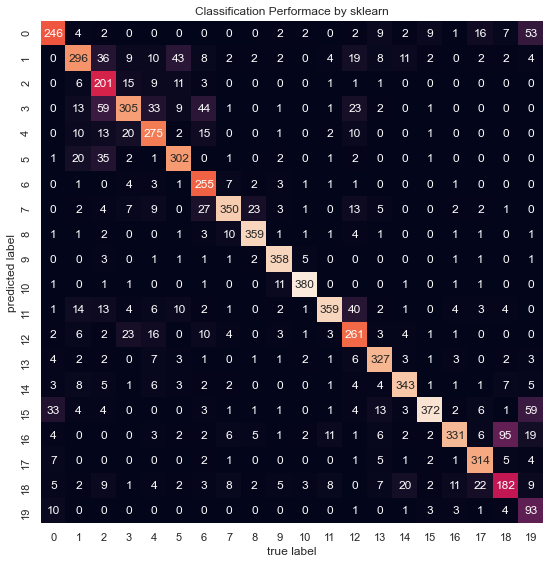

In [14]:
# plot classification matrix
mat = confusion_matrix(test_label, predict_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Classification Performace by sklearn')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.tight_layout()
plt.savefig('./nb/output/nbm_mine.png')
plt.show()

<span style="color:red"> **Reminder:** </span> Do not forget to run nbm_sklearn.py to compare the results to get the accuracy and confusion matrix by sklearn implementation. You can run `python nbm_sklearn.py` under the folder path of `./hw6/nb/`.

**Question & Analysis**

1. Report your classification accuracy on train and test documents. Also report your classification confusion matrix. Show one example document that Naive Bayes classifies incorrectly (i.e. fill in the following result table). Briefly explain your observation on the accuracy and confusion matrix.

|    |   Train set accuracy |  Test set accuracy  |
| :---        |    :----:   |                ---: |
| sklearn implementaion|   0.9326498143892522       |       0.7738980350504514        |
| your implementaion   |    0.9481764131688704      |      0.7873417721518987         |

2. Show one example document that Naive Bayes classifies incorrectly by filling the following table. Provide your thought on the reason why this document is misclassified. (Note that the topic mapping is available at `train.map` same as `test.map`)

|  Words (count) in the example document  | Predicted label |  Truth label |
| :---        |    :----:   |                ---: |
| For example, student (4), education (2), ... |     Class A     |   Class B    |

3. Is Naive Bayes a generative model or discriminative model and why?

Naive Bayes is a generative model because it doesn't try to draw a boundary within a given space. Instead it tries to model the joint probability distribution of the input features and the output labels. 

----

## End